In [1]:
# Load many metrics evaluated

In [2]:
import numpy as np
import os, glob, sys, toml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from itertools import combinations
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [3]:
# serial version
# # read all evaluation results
# basinnum = 627
# iternum = 8

# inpath = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_250_MOASMOcalib/ctsm_outputs/iter1_trial10/evaluation_many_metrics.csv'

# initflag = True

# for b in range(basinnum):
#     for i in range(iternum):
#         for t in range(400):
#             file = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{b}_MOASMOcalib/ctsm_outputs/iter{i}_trial{t}/evaluation_many_metrics.csv'
#             if os.path.isfile(file):
#                 df1 = pd.DataFrame({'basin':[b], 'iter':[i], 'trial':[t]})
#                 df2 = pd.read_csv(file)
#                 df3 = pd.concat([df1, df2], axis=1)
#                 if initflag:
#                     df_all = df3
#                     initflag = False
#                 else:
#                     df_all = pd.concat([df_all, df3])

# df_all.head()

In [4]:
import pandas as pd
import os
from concurrent.futures import ThreadPoolExecutor

# Define the number of basins, iterations, and trials
basinnum = 627
iternum = 8
trialnum = 400

# Function to read and concatenate a single file
def process_file(b, i, t):
    file = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{b}_MOASMOcalib/ctsm_outputs/iter{i}_trial{t}/evaluation_many_metrics.csv'
    if os.path.isfile(file):
        df1 = pd.DataFrame({'basin': [b], 'iter': [i], 'trial': [t]})
        df2 = pd.read_csv(file)
        return pd.concat([df1, df2], axis=1)
    return None

# Collect all DataFrames in a list
df_list = []

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor(max_workers=36) as executor:
    futures = []
    for b in range(basinnum):
        for i in range(iternum):
            for t in range(trialnum):
                futures.append(executor.submit(process_file, b, i, t))
    
    for future in futures:
        result = future.result()
        if result is not None:
            df_list.append(result)

# Concatenate all DataFrames at once
df_all = pd.concat(df_list, ignore_index=True)

# Display the first few rows of the final DataFrame
print(df_all.head())

   basin  iter  trial       kge        mae       nse        cc        rmse  \
0      0     0      0 -0.158664  55.688609 -3.336715  0.381564  103.915075   
1      0     0      1 -0.033472  64.070481 -3.364477  0.301541  113.232977   
2      0     0      2 -0.195106  72.901145 -5.264780  0.477925  139.595536   
3      0     0      3 -0.059784  52.276246 -2.897793  0.404191  100.561927   
4      0     0      4 -0.106549  60.308160 -3.595270  0.377303  112.199346   

   max_mon_abs_err     q90_mae  ...  kge_winter  kge_spring  kge_autumn  \
0       122.261683  149.512866  ...   -1.595937   -0.142621   -0.326314   
1        89.350981  151.225302  ...   -0.197479   -0.146189   -0.603522   
2       177.925541  208.485838  ...   -0.635510   -0.244927   -0.804226   
3       123.210603  167.630329  ...    0.071418   -0.196334   -0.101228   
4       133.774077  175.052305  ...   -0.131363   -0.280465   -0.207256   

   mae_summer  mae_winter  mae_spring  mae_autumn  ge_q25_mae  ge_q50_mae  \
0  

In [13]:
# plot metric with iterations

kge = np.nan * np.zeros([basinnum, iternum+1])
mae = np.nan * np.zeros([basinnum, iternum+1])
max_mon_abs_err = np.nan * np.nan * np.zeros([basinnum, iternum+1])

for b in range(basinnum):

    df_tar = df_all.loc[df_all['basin']==b]
    
    for i in range(iternum):
        if i == 0:
            kge[b, 0] = df_tar['kge'].values[0] # default
            mae[b, 0] = df_tar['mae'].values[0] # default
            max_mon_abs_err[b, 0] = df_tar['max_mon_abs_err'].values[0] # default

        kge[b, i+1] = np.nanmax(df_tar.loc[df_tar['iter']==i]['kge'].values)
        mae[b, i+1] = np.nanmin(df_tar.loc[df_tar['iter']==i]['mae'].values)
        max_mon_abs_err[b, i+1] = np.nanmin(df_tar.loc[df_tar['iter']==i]['max_mon_abs_err'].values)


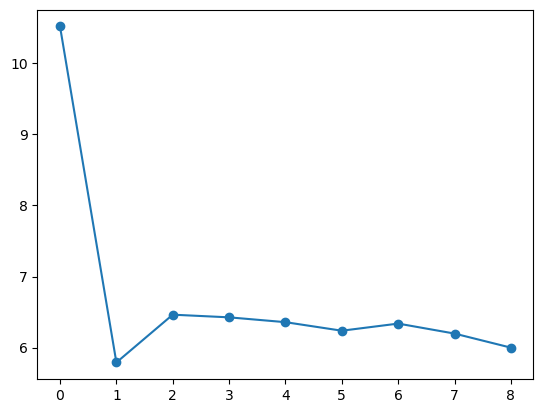

In [16]:
# plt.plot(np.nanmedian(kge,axis=0), 'o-')
# plt.plot(np.nanmean(mae,axis=0), 'o-')
plt.plot(np.nanmean(max_mon_abs_err,axis=0), 'o-')